In [1]:
import os
import sys
import requests
import time
import json

def api_call(image_path):
    
    json_file = open('key.json')
    json_data = json.load(json_file)
    
    client_id = json_data['client_id']
    client_secret = json_data['client_secret']
    url = "https://naveropenapi.apigw.ntruss.com/vision-obj/v1/detect"

    files = {'image': open(image_path, 'rb')}
    headers = {'X-NCP-APIGW-API-KEY-ID': client_id, 'X-NCP-APIGW-API-KEY': client_secret }

    response = requests.post(url,  files=files, headers=headers)
    rescode = response.status_code

    return json.loads(response.text)

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import colors

def postProcessing(image_path,detections):

    image = cv2.imread(image_path)
    height, width, _ = image.shape
    for label,name, score, bbox in zip(detections['detection_classes'],detections['detection_names'],detections['detection_scores'],detections['detection_boxes']):

        b = np.array(bbox)
        b[0],b[1] = b[1],b[0]
        b[2],b[3] = b[3],b[2]

        b[0] *= width
        b[2] *= width
        b[1] *= height
        b[3] *= height

        b= b.astype(int)

        color = colors.label_color(int(label))
        cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), color, 2, cv2.LINE_AA)

        caption="{} {:.3f}".format(name, score)
        #draw_caption(draw, b, caption)
        cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 2)
        cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
    
    return image


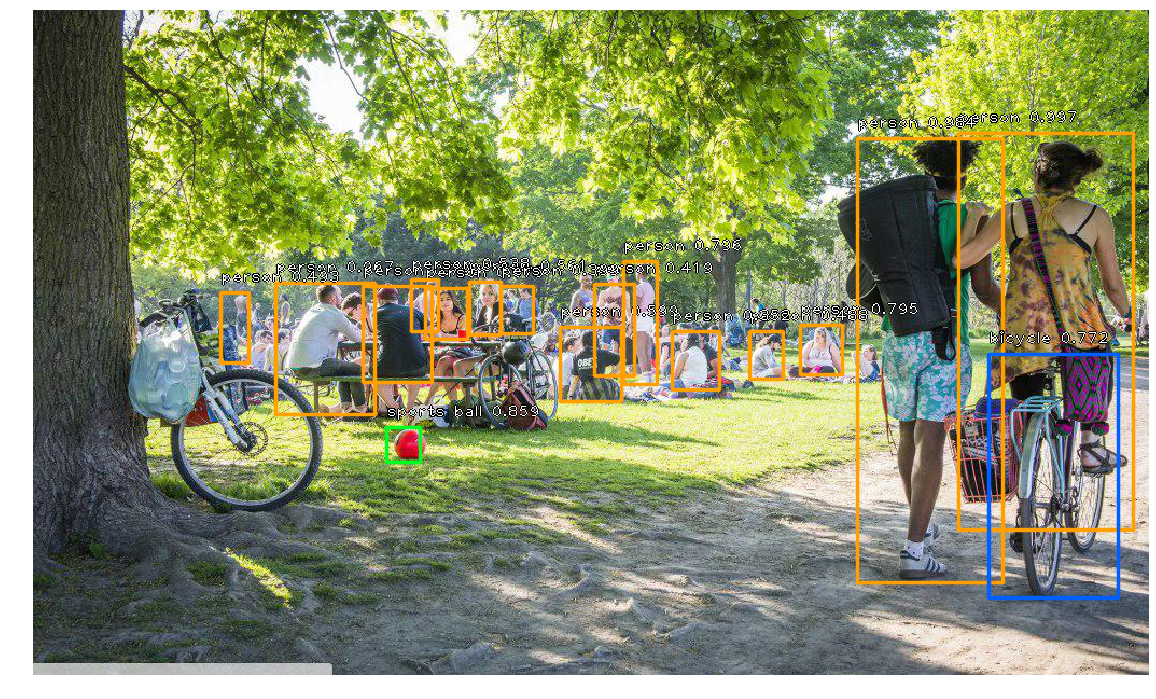

In [6]:
image_path = 'sample.jpg'

detections = api_call(image_path)
detections = detections['predictions'][0]
image = postProcessing(image_path,detections)

cv2.imwrite('res.jpg',image)

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(image)
plt.show()